# Wind (Onshore) Power Data Analysis


We use the "EMHIRES dataset: wind and solar power generation data set" (cf. https://setis.ec.europa.eu/emhires-dataset-part-i-wind-power-generation_en and  https://zenodo.org/records/8340501).
The data set provides wind power time series (onshore) at hourly granularity and at a NUTS 2 (cf. the European Nomenclature of territorial  units for statistics (NUTS) defined by EUROSTAT,“EUROSTAT European Statistics,” [Online]. Available: http://ec.europa.eu/eurostat/web/nuts/history) aggregation level.

Gonzalez-Aparicio, I., Zucker, A., Careri, F., Monforti, F., Huld, T., & Badger, J. (2021). EMHIRES dataset: wind and solar power generation [Data set]. Zenodo. https://doi.org/10.5281/zenodo.8340501

https://www.sciencedirect.com/science/article/pii/S0306261917304622


https://phys.org/news/2016-11-energy-area-emhires.html:
The Joint Research Centre (JRC) has produced a dataset of wind energy production (EMHIRES) at national, regional and local level across the EU, by the hour for the last 30 years, based on existing wind farms. The detailed information provided by EMHIRES will improve the assessment of wind energy generation possibilities and help policy-makers devise better energy frameworks for consumers, the energy market and the planet, as foreseen by the EU's Energy Union strategy.

EMHIRES, which stands for 'European Meteorological derived High resolution Renewable Energy Sources generation time series' is the result of a unique and innovative methodology developed by the JRC that captures local geographical information in the variability of wind energy, in particular peaks and ramps, much more accurately than previous meteorologically derived time series.

Reliable modelling of renewable energy generation by wind turbines depends on the accurate representation of the spatial and temporal characterisation of data on the winds. The variability of wind energy production makes power system studies inherently prone to errors, which therefore either overstate or downplay the possible role of renewable energy in the future energy mix. To fill the gap in knowledge, JRC scientists developed the EMHIRES (wind) dataset.

The strength of EMHIRES when compared to similar datasets lays in combining the most recent research advances on weather and wind power. It is currently the only wind power time series dataset publicly available for such a long period at EU Member State and sub-national level (regions, provinces and counties, known as NUTS 1 and NUTS 2, based on the existing national administrative subdivisions).

The data includes the effects that barriers like mountains or sea breezes and coastal terrains have on winds. Those locations are the most favourable places to produce wind energy. In addition, the dataset also takes into consideration the amount of energy produced by existing wind farms in Europe in every hour during the last three decades.

Fed into larger, more complex models to calculate sophisticated energy scenarios, EMHIRES data could help bring about better planning of energy projects, and ultimately more secure supply and cheaper energy for European consumers.

The EMHIRES database on wind and its development are described in the JRC report EMHIRES dataset Part I: Wind power generation. In the near future, a second report will be published, describing the development of the EMHIRES (photovoltaic – PV) database, which focusses on solar energy sources.


 

In [3]:
import pickle
import os
import openpyxl
import plotly.express as px
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


## Data import/processing


In [47]:
##read excel file, convert to dataframe and save time step and date 
data_path = "C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_COUNTRY/EMHIRES_WIND_COUNTRY_June2019.xlsx"
wb = openpyxl.load_workbook(filename=data_path, read_only=True)
ws = wb.active
# Load the rows
rows = ws.rows
first_row = [cell.value for cell in next(rows)]
# Load the data
data = []
for row in rows:
    record = {}
    for key, cell in zip(first_row, row):
        record[key] = cell.value
    data.append(record)
# Convert to a df
df_COUNTRIES = pd.DataFrame(data)
print("df done")
df_COUNTRIES.head()
#df.to_pickle("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_COUNTRY/EMHIRES_WIND_COUNTRY_June2019.pkl")
#print("pickle done")

ts_date_mapping = df_COUNTRIES.filter(regex='Date|Time_step')


df done


In [38]:
##read excel file, convert to dataframe and pickle
data_path = "C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_NUTS2/EMHIRES_WIND_NUTS2_June2019.xlsx"
wb = openpyxl.load_workbook(filename=data_path, read_only=True)
ws = wb.active
# Load the rows
rows = ws.rows
first_row = [cell.value for cell in next(rows)]
# Load the data
data = []
for row in rows:
    record = {}
    for key, cell in zip(first_row, row):
        record[key] = cell.value
    data.append(record)
# Convert to a df
df = pd.DataFrame(data)
print("df done")
df.head()

df done


,Time step,AL01,AL02,AL03,AT11,AT12,AT13,AT21,AT22,AT31,...,UKK3,UKK4,UKL1,UKL2,UKM5,UKM6,UKM7,UKM8,UKM9,UKN0
0,1.0,0.284,0.284,0.453,0.026,0.058,0.024,0.049,0.049,0.348,...,0.198,0.284,0.501,0.390,0.174,0.477,0.042,0.241,0.241,0.292
1,2.0,0.285,0.285,0.362,0.022,0.049,0.015,0.048,0.048,0.338,...,0.094,0.177,0.425,0.332,0.232,0.496,0.068,0.274,0.274,0.219
2,3.0,0.262,0.262,0.285,0.015,0.038,0.006,0.060,0.060,0.298,...,0.041,0.093,0.342,0.250,0.317,0.521,0.086,0.262,0.262,0.133
3,4.0,0.262,0.262,0.258,0.007,0.025,0.000,0.054,0.054,0.229,...,0.035,0.050,0.261,0.127,0.429,0.556,0.097,0.221,0.221,0.062
4,5.0,0.243,0.243,0.263,0.002,0.015,0.000,0.048,0.048,0.150,...,0.088,0.050,0.184,0.083,0.541,0.594,0.086,0.149,0.149,0.025


In [68]:
df_DE = df.filter(regex='DE|Time step')
df_DE.head()

,Time step,DE11,DE12,DE13,DE14,DE21,DE22,DE23,DE24,DE25,...,DEB1,DEB2,DEB3,DECOO,DED2,DED4,DED5,DEE0,DEF0,DEG0
0,1.0,0.074,0.024,0.033,0.033,0.128,0.359,0.205,0.121,0.174,...,0.012,0.010,0.006,0.101,0.036,0.071,0.038,0.051,0.413,0.026
1,2.0,0.054,0.020,0.035,0.035,0.090,0.337,0.173,0.117,0.133,...,0.015,0.009,0.004,0.120,0.032,0.072,0.037,0.049,0.372,0.030
2,3.0,0.035,0.015,0.040,0.040,0.039,0.306,0.129,0.103,0.091,...,0.015,0.008,0.003,0.146,0.031,0.074,0.040,0.056,0.339,0.034
3,4.0,0.017,0.010,0.049,0.049,0.008,0.224,0.075,0.084,0.049,...,0.010,0.005,0.001,0.175,0.032,0.070,0.042,0.070,0.325,0.038
4,5.0,0.007,0.008,0.074,0.074,0.001,0.150,0.038,0.067,0.023,...,0.005,0.003,0.000,0.189,0.033,0.064,0.042,0.079,0.322,0.041


In [69]:
frames = [ts_date_mapping, df_DE]
result = pd.concat(frames,axis = 1)
result = result.drop('Time_step', axis=1)
result.head()

result.to_pickle("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_NUTS2/EMHIRES_WIND_NUTS2_June2019_DE.pickle")

## Read in Pickle-File for wind power (onshore) time series on NUTS2 level in Germany

In [4]:
df_DE = pd.read_pickle("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/EMHIRES_WIND_ONSHORE_NUTS2/EMHIRES_WIND_NUTS2_June2019_DE.pickle")
df_DE.head()

print(df_DE)

             Date  Time step   DE11   DE12   DE13   DE14   DE21   DE22   DE23  \
0      1986-01-01        1.0  0.074  0.024  0.033  0.033  0.128  0.359  0.205   
1      1986-01-01        2.0  0.054  0.020  0.035  0.035  0.090  0.337  0.173   
2      1986-01-01        3.0  0.035  0.015  0.040  0.040  0.039  0.306  0.129   
3      1986-01-01        4.0  0.017  0.010  0.049  0.049  0.008  0.224  0.075   
4      1986-01-01        5.0  0.007  0.008  0.074  0.074  0.001  0.150  0.038   
...           ...        ...    ...    ...    ...    ...    ...    ...    ...   
262966 2015-12-31   262967.0  0.001  0.002  0.002  0.002  0.002  0.000  0.000   
262967 2015-12-31   262968.0  0.001  0.002  0.006  0.006  0.001  0.000  0.000   
262968        NaT        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
262969        NaT        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
262970        NaT        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         DE24  ...   DEB1  

# Statistical Overview

### Aggregation from hourly to daily data

In [5]:
# daily average
df_DE['Date'] = pd.to_datetime(df_DE['Date'], format='%Y-%m-%d')
df_daily = df_DE.groupby([df_DE['Date'].dt.date],as_index=False).agg(lambda x : x.mean() if x.dtype=='int64' else x.head(1))

print(df_daily)


            Date  Time step   DE11   DE12   DE13   DE14   DE21   DE22   DE23  \
0     1986-01-01        1.0  0.074  0.024  0.033  0.033  0.128  0.359  0.205   
1     1986-01-02       25.0  0.166  0.174  0.275  0.275  0.080  0.013  0.086   
2     1986-01-03       49.0  0.430  0.526  0.511  0.511  0.254  0.155  0.300   
3     1986-01-04       73.0  0.287  0.145  0.428  0.428  0.311  0.118  0.294   
4     1986-01-05       97.0  0.183  0.161  0.155  0.155  0.299  0.215  0.231   
...          ...        ...    ...    ...    ...    ...    ...    ...    ...   
10952 2015-12-27   262849.0  0.152  0.126  0.193  0.193  0.150  0.083  0.119   
10953 2015-12-28   262873.0  0.000  0.002  0.012  0.012  0.000  0.014  0.006   
10954 2015-12-29   262897.0  0.066  0.053  0.025  0.025  0.088  0.203  0.127   
10955 2015-12-30   262921.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
10956 2015-12-31   262945.0  0.096  0.152  0.292  0.292  0.027  0.425  0.229   

        DE24  ...   DEB1   DEB2   DEB3 

## Exemplarily Analysis for one selected NUTS 2 Region: here "DE71" Darmstadt

In [12]:
NUTS2 = "DE71"
##letzte 5 Jahre
#df_daily = df_daily[df_daily["Date"] >= '2011-01-01']
df = df_daily

fig = px.line(df, x="Date", y=NUTS2, title='Daily Wind (Onshore) (Acc.)',log_y = False)
fig.show()

resampled_df = df[['Date',NUTS2]].resample('7D', on='Date').mean().reset_index(drop=False)
fig = px.line(resampled_df, x="Date", y=NUTS2, title='Weekly Wind (Onshore) (Acc.)',log_y = True)
fig.show()

resampled_df = df[['Date',NUTS2]].resample('M', on='Date').mean().reset_index(drop=False)
fig = px.line(resampled_df, x="Date", y=NUTS2, title='Monthly Wind (Onshore) (Acc.)',log_y = True)
fig.show()


Downsample dataframe to monthly time series for analysis

In [13]:
# downsample dataframe weekly
df_monthly = df.resample('M', on='Date').mean().reset_index(drop=False)

df = df_monthly.copy()
print(df)

          Date  Time step      DE11      DE12      DE13      DE14      DE21  \
0   1986-01-31      361.0  0.394903  0.355935  0.458420  0.458420  0.456774   
1   1986-02-28     1069.0  0.147643  0.116500  0.127393  0.127393  0.126357   
2   1986-03-31     1777.0  0.189032  0.179484  0.206452  0.206452  0.161323   
3   1986-04-30     2509.0  0.126833  0.099200  0.180433  0.180433  0.185767   
4   1986-05-31     3241.0  0.051323  0.033935  0.065097  0.065097  0.065032   
..         ...        ...       ...       ...       ...       ...       ...   
355 2015-08-31   259657.0  0.057581  0.043645  0.064871  0.064871  0.040677   
356 2015-09-30   260389.0  0.101567  0.073900  0.131800  0.131800  0.113367   
357 2015-10-31   261121.0  0.046871  0.036935  0.065774  0.065774  0.056226   
358 2015-11-30   261853.0  0.287167  0.242200  0.313900  0.313900  0.327267   
359 2015-12-31   262585.0  0.184839  0.170000  0.216935  0.216935  0.173903   

         DE22      DE23      DE24  ...      DEB1   

### Analyse seasonality of time series

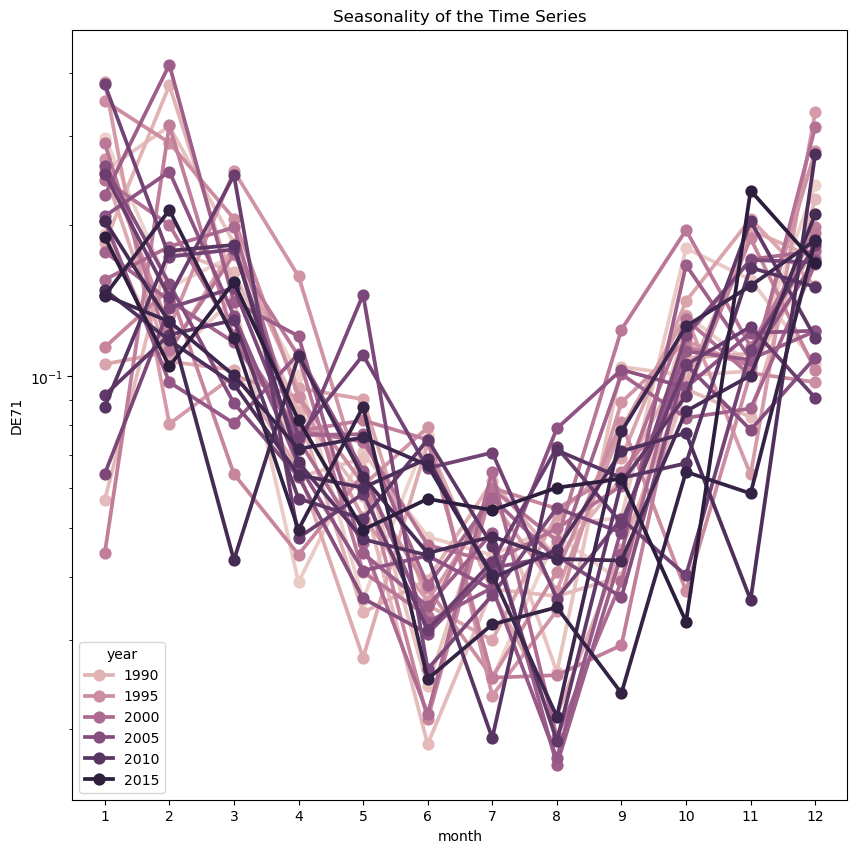

In [14]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['Date', 'year', 'month', 'day', 'day_of_year', 'quarter', 'season']].head()

# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='month',y=NUTS2,hue='year',data=df)
plt.yscale('log')

month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

The series clearly has some seasonality, the higher values are around November and February and the lower are between July and September.

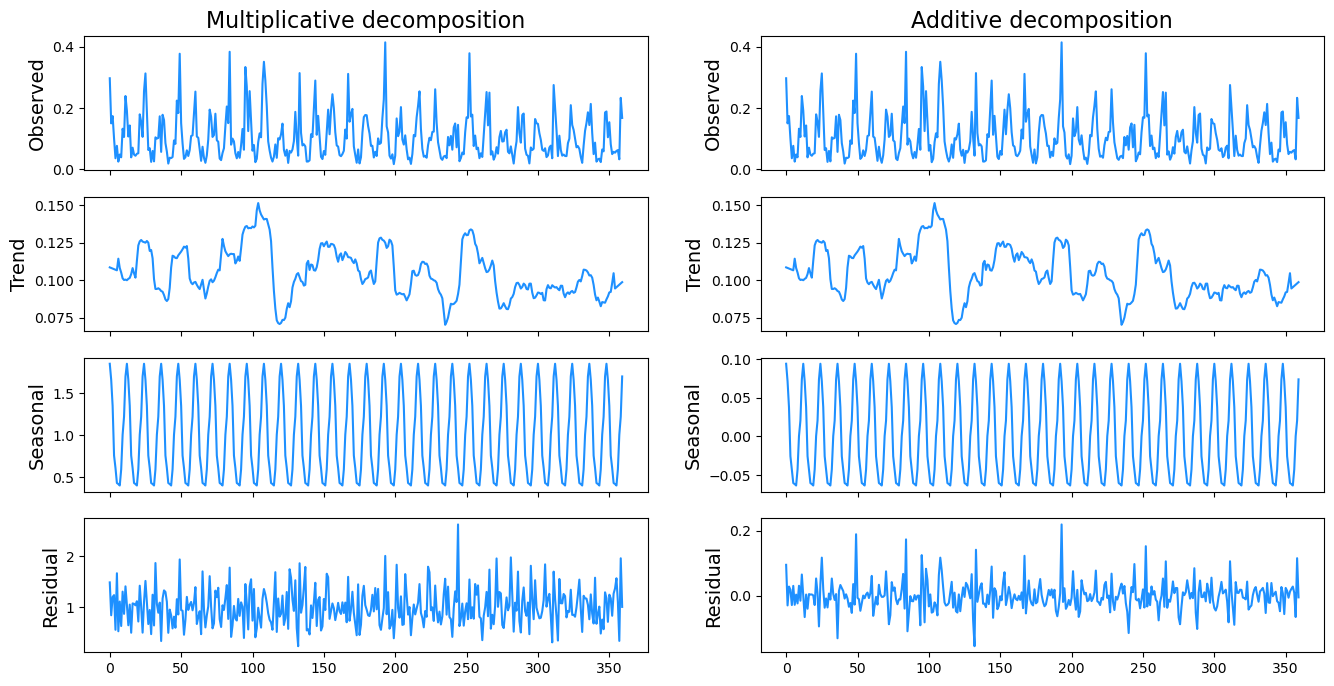

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['DE71', 'DE71']):
    
    if i == 0:
        bla = 'Multiplicative'
        res = seasonal_decompose(df[column], period=12, model='multiplicative', extrapolate_trend='freq')
    else:
        bla = 'Additive'
        res = seasonal_decompose(df[column], period=12, model='additive', extrapolate_trend='freq')


    ax[0,i].set_title(bla+' decomposition', fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

## SARIMA Model for Univariate Time Series


Analysis is based on https://www.kaggle.com/code/leandrovrabelo/climate-change-forecast-sarima-model and https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide

Transform time series to log

In [16]:
df_selected = df[['Date',NUTS2]]


df_selected[NUTS2] = np.log(df_selected[NUTS2])
df_selected.head()

fig = px.line(df_selected, x="Date", y=NUTS2, title='Log. of Monthly Wind (Onshore) (Acc.)')
fig.show()

C:\Users\Anwender\AppData\Local\Temp\ipykernel_20448\211551295.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Check for stationarity

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

constant mean and mean is not time-dependent;
constant variance and variance is not time-dependent;
constant covariance and covariance is not time-dependent

The check for stationarity can be done via three different approaches:

visually: plot time series and check for trends or seasonality

basic statistics: split time series and compare the mean and variance of each partition

statistical test: Augmented Dickey Fuller test



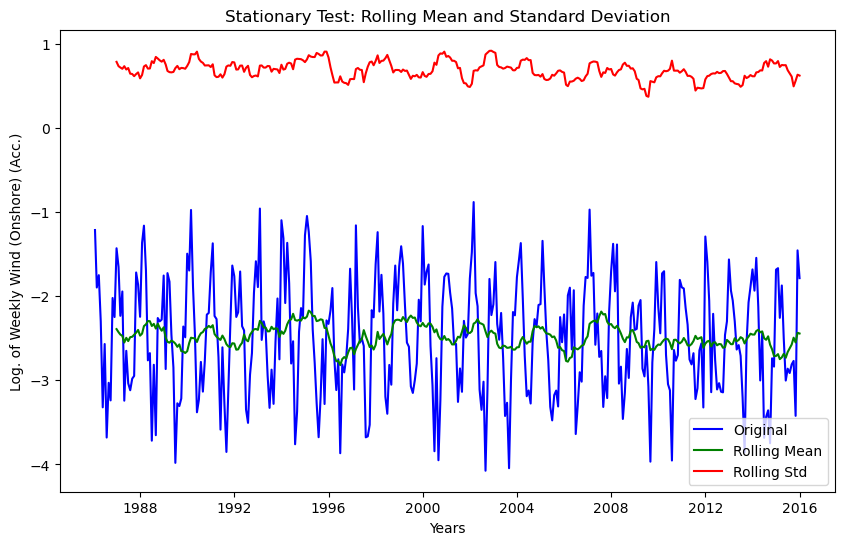

Results of Dickey-Fuller Test
Test Statistic                  -5.531666
p-value                          0.000002
#Lags Used                      17.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


In [18]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries,time):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('Log. of Weekly Wind (Onshore) (Acc.)')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(time,timeseries, color= 'blue', label= 'Original')
    plt.plot(time, rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(time, rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

stationarity_test(df_selected[NUTS2],df_selected['Date'])


In this visual check, we can see that the features don't have constant mean and std, but they are close to it.


Unit Root Test
Unit root is a characteristic of a time series that makes it non-stationary. And ADF test belong to the unit root test. 

The presence of a unit root means the time series is non-stationary.


Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\565683513.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -5.5317
p-value                          0.0000
Lags Used                       17.0000
Number of Observations Used    342.0000
Critical Value (1%)             -3.4496
Critical Value (5%)             -2.8700
Critical Value (10%)            -2.5713
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


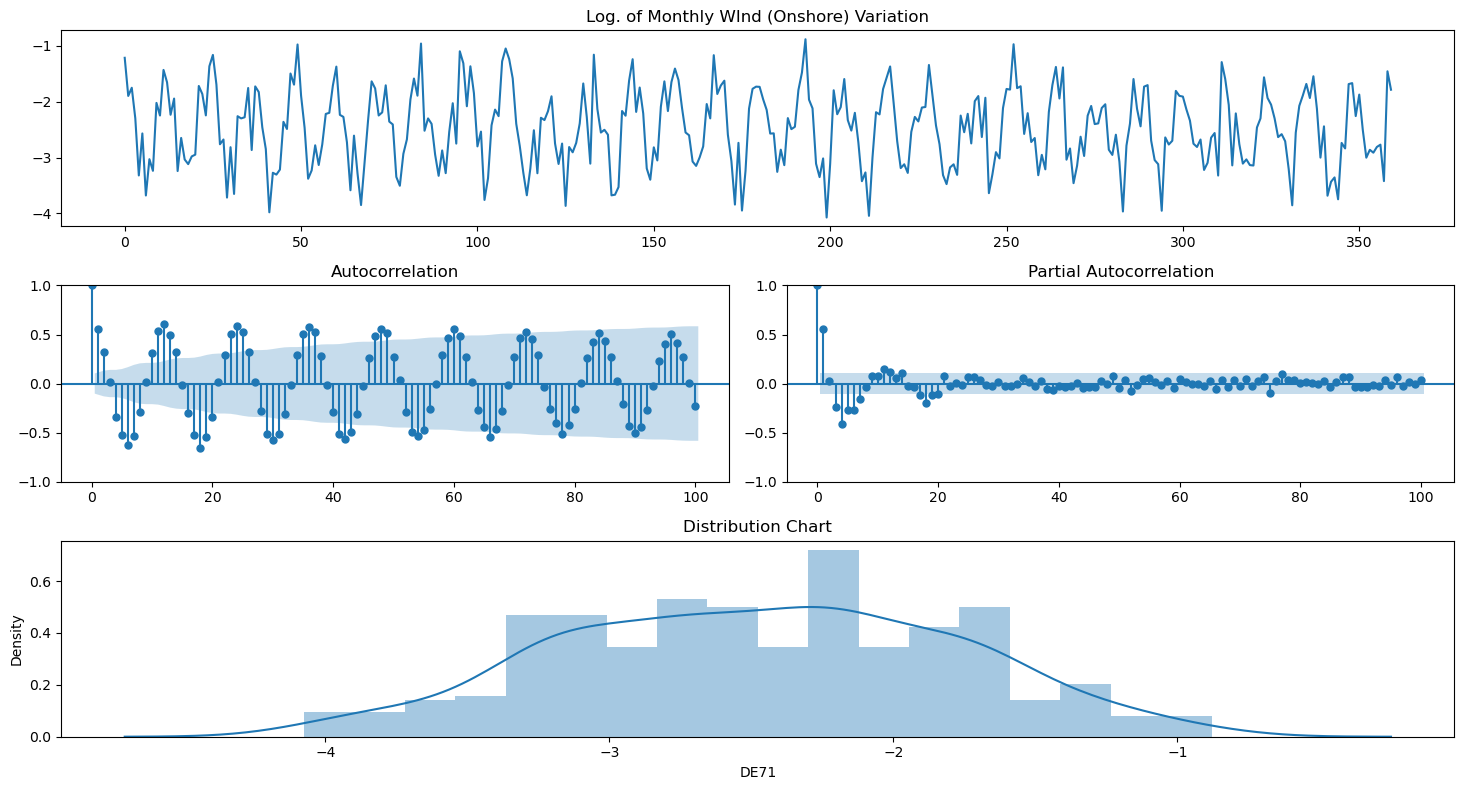

In [329]:
def check_stationarity(y, lags_plots=100, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Log. of Monthly WInd (Onshore) Variation')
    plot_acf(y, lags=lags_plots, ax=ax2);
    plot_pacf(y, lags=lags_plots, ax=ax3);
    sns.distplot(y, bins=int(np.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = np.round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

check_stationarity(df_selected[NUTS2])

As we can see, it appears that there is some seasonality with higher wind power at the begining and end of the year and lower wind power around the middle of the year.

To create a time series forecast, the series must be stationary (constant mean, variance and autocorrelation).

One way to check if the series is stationary is using the adfuller function, if the P-Value is lower than 5% (usual number used for this kind of study) the series is stationary and you can start creating your model.

If the series isn't stationary you can do some data transformation like using natural logarithm, deflation, differencing, etc.

Below is the function that I used to check the stationarity, it plots:

The series itself;
The autocorrelation function (ACF):
It shows the correlation between the current wind power versus the lagged versions of itself.

The partial autocorrelation (PACF):
It shows the correlation between the current wind power versus the lagged version excluding the effects of earlier lags, for example, it show the effective influence of the lag 3 in the current temperatures excluding the effects of the lags 1 and 2.
For more interesting sources you can read the materials on this amazing website made by Mr. Robert Nau: Duke University, also you can check Jason Brownlee's website, which have a lot of time series content.

The series has an interesting behavior, there is a sequential significative negative autocorrelation starting at lag 4 and repeating each 12 months, it's because of the difference in the seasons, if today is winter with high wind power in 6 months we will have lower wind power generation in the summer, that's why the negative autocorrelation occurs. 

Also, from lag 12 and sequentially from every 12 lags there is a significant positive autocorrelation. The PACF shows a positive spike in the first lag and a drop to negative PACF in the following lags.

This behavior between the ACF and PACF plots suggests an AR(1) model and also a first seasonal difference ( Yt−Yt−12). I'll plot the stationarity function again with the first seasonal difference to see if we will need some SAR(P) or SMA(Q) parameter:

C:\Users\Anwender\AppData\Local\Temp\ipykernel_14412\565683513.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -8.1907
p-value                          0.0000
Lags Used                       11.0000
Number of Observations Used    336.0000
Critical Value (1%)             -3.4500
Critical Value (5%)             -2.8702
Critical Value (10%)            -2.5714
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


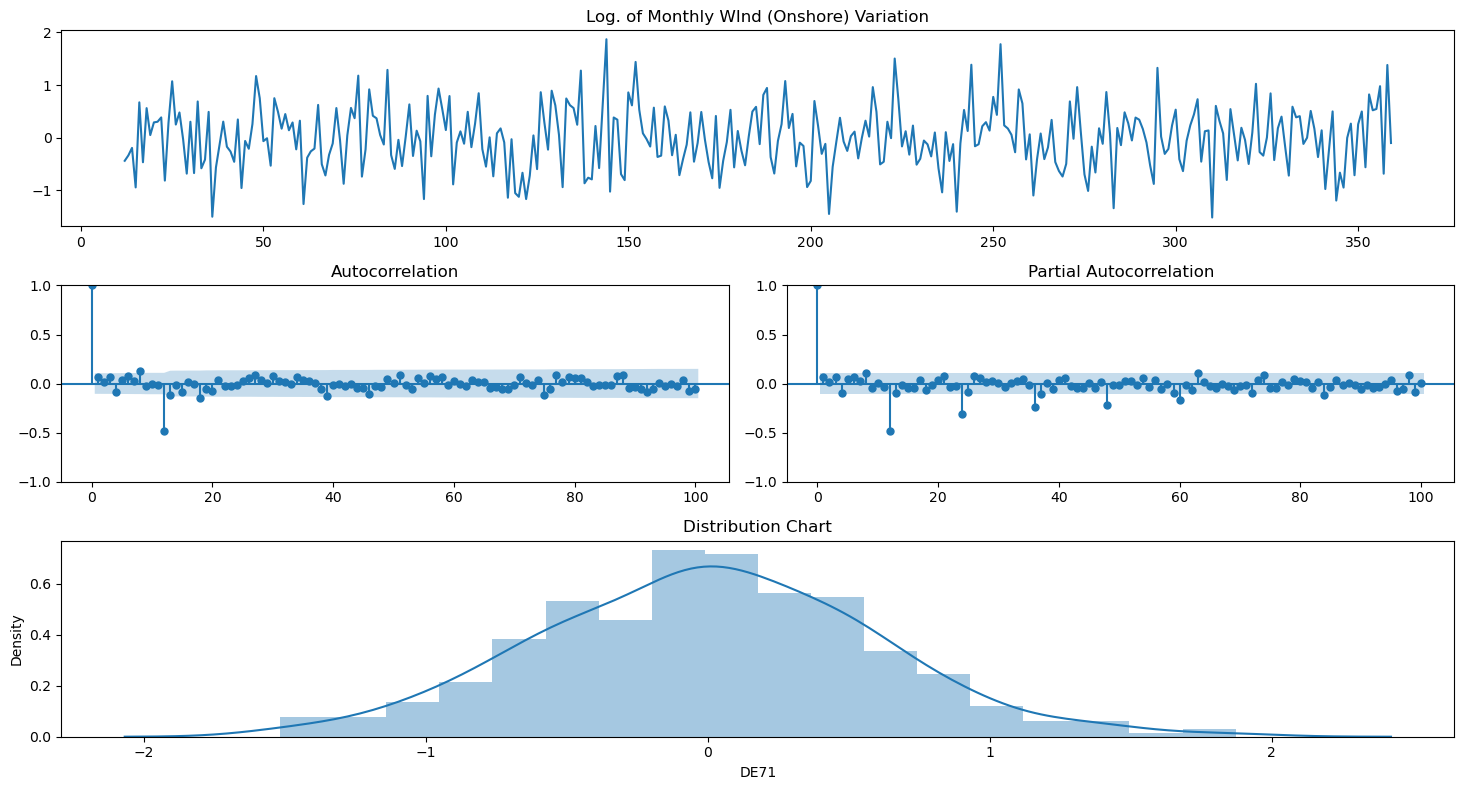

In [331]:
check_stationarity(df_selected[NUTS2].diff(12).dropna())

As the plots above showed, the ACF and  the PACF drops under the confidence interval at the first lag.

-> white noise

As we used a first seasonal difference, the ACF and PACF showed a significative drop in the 12th lag, it means an SMA signature with a parameter of 1 lag, resuming this is an SAR(1) with a first difference.

Before we go on, i'm going to split the data in training, validation and test set.

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


train_data, test_data = df_selected[0:int(len(df_selected)*0.9)], df_selected[int(len(df_selected)*0.9):]


train_arima = train_data[NUTS2]
test_arima = test_data[NUTS2]



https://www.kaggle.com/code/leandrovrabelo/climate-change-forecast-sarima-model

Below I'll try to make a brief explanation about ARIMA models:

SARIMA Model (p, d, q)(P, D, Q, S):
SARIMA stands for Seasonal Auto Regressive Integrated Moving Average, The name scares, but this is not as scary as it seems.

Non seasonal ARIMA:
We can split the Arima term into three terms, AR, I, MA:

AR(p) stands for autoregressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead, example:

The average temperature of yesterday has a high correlation with the temperature of today, so we will use AR(1) parameter to forecast future temperatures.
The formula for the AR(p) model is:  y^t=μ+θ1Yt−1+...+θpYt−p
  Where  μ
  is the constant term, the p is the periods to be used in the regression and  θ
  is the parameter fitted to the data.
I(d) is the differencing part, the d parameter tells how many differencing orders are going to be used, it tries to make the series stationary, example:

Yesterday I sold 10 items of a product, today I sold 14, the "I" in this case is just the first difference, which is +4, if you are using logarithm base this difference is equivalent to percentual difference.
If d = 1:  yt=Yt−Yt−1
  where  yt
  is the differenced series and  Yt−period
  is the original series
If d = 2:  yt=(Yt−Yt−1)−(Yt−1−Yt−2)=Yt−2Yt−1+Yt−2
 
Note that the second difference is a change-in-change, which is a measure of the local "acceleration" rather than trend.
MA(q) stands for moving average model, the q is the number of lagged forecast errors terms in the prediction equation, example:
It's strange, but this MA term takes a percentage of the errors between the predicted value against the real. It assumes that the past errors are going to be similar in future events.
The formula for the MA(p) model is:  y^t=μ−Θ1et−1+...+Θqet−q
  Where  μ
  is the constant term, q is the period to be used on the  e
  term and  Θ
  is the parameter fitted to the errors


Seasonal ARIMA:
The p, d, q parameters are capitalized to differ from the non seasonal parameters.

SAR(P) is the seasonal autoregression of the series.

The formula for the SAR(P) model is:  y^t=μ+θ1Yt−s
  Where P is quantity of autoregression terms to be added, usually no more than 1 term, s is how many periods ago to be used as base and  θ
  is the parameter fitted to the data.
Usually when the subject is weather forecasting, 12 months ago have some information to contribute to the current period.
Setting P=1 (i.e., SAR(1)) adds a multiple of  Yt−s
  to the forecast for  yt
 
I(D) the seasonal difference MUST be used when you have an strong and stable pattern.

If d = 0 and D = 1:  yt=Yt−Yt−s
  where  yt
  is the differenced series and  Yt−s
  is the original seasonal lag.
If d =1 and D = 1:  yt=(Yt−Yt−1)−(Yt−s−Yt−s−1)=Yt−Yt−1−Yt−s+Yt−s−1
 
D should never be more than 1, and d+D should never be more than 2. Also, if d+D =2, the constant term should be suppressed.
SMA(Q)

Setting Q=1 (i.e., SMA(1)) adds a multiple of error  et−s
  to the forecast for  yt
 
S It's the seasonal period where you are going to calculate the the P, D, Q terms. If there is a 52 week seasonal correlation this is the number to be used on the 'S' parameter



We will use SARIMAX and Auto-ARIMA to create a forecast, the following terms are a definition to the trend:

'n' when there is no trend to be used (default).
‘c’ indicates a constant (i.e. a degree zero component of the trend polynomial)
‘t’ indicates a linear trend with time
‘ct’ is both trend and constant.
Can also be specified as an iterable defining the polynomial as in numpy.poly1d, where [1,1,0,1] would denote a+bt+ct3



Auto ARIMA model: The advantage of using Auto ARIMA over the ARIMA model is that after data preprocessing step we can skip the next steps & directly fit our model. It uses the AIC (Akaike Information Criterion) values generated by trying different combinations of p,q & d values to fit the model.

In [338]:
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)



print(model.summary())



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4958.812, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4352.153, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4736.455, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4226.291, Time=0.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4437.573, Time=0.37 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4094.416, Time=0.85 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4222.828, Time=0.45 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.90 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.02 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4042.057, Time=1.13 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4176.1

As we saw in the previous Steps, AutoARIMA (auto_arima) validates that SARIMAX(2, 1, 2)x(2, 1, [], 12) is the best configuration.

In [340]:
# For the Test: we'll need to chop off a portion of our latest data, say from 2016, Jan.
test = test_data

# Fore the Train: we'll train on the rest of the data after split the test portion
train = train_data

print(model.fit(train_data[NUTS2]))

 ARIMA(2,1,2)(2,1,0)[12]          


In [341]:
future_forecast = model.predict(n_periods=49)
print(future_forecast)

324   -1.849637
325   -2.127649
326   -2.260175
327   -2.693393
328   -2.758182
329   -3.105952
330   -3.305972
331   -3.071177
332   -2.761130
333   -2.683799
334   -2.372046
335   -1.689270
336   -1.713289
337   -2.199601
338   -2.501540
339   -2.642638
340   -2.718290
341   -3.035711
342   -3.138295
343   -3.169674
344   -2.796432
345   -2.634876
346   -2.635090
347   -1.570572
348   -1.679256
349   -2.182007
350   -2.613408
351   -2.559966
352   -2.718454
353   -3.129774
354   -3.132113
355   -3.169650
356   -2.884148
357   -2.630670
358   -2.418146
359   -1.642803
360   -1.734196
361   -2.203597
362   -2.444101
363   -2.664608
364   -2.722152
365   -3.121902
366   -3.185966
367   -3.164193
368   -2.807713
369   -2.677010
370   -2.466889
371   -1.660952
372   -1.706422
dtype: float64


          Date      DE71  Prediction
324 2013-01-31 -1.932357   -1.849637
325 2013-02-28 -2.051548   -2.127649
326 2013-03-31 -2.298079   -2.260175
327 2013-04-30 -2.633407   -2.693393
328 2013-05-31 -2.580849   -2.758182
329 2013-06-30 -2.708050   -3.105952
330 2013-07-31 -3.206852   -3.305972
331 2013-08-31 -3.855582   -3.071177
332 2013-09-30 -2.553614   -2.761130
333 2013-10-31 -2.073524   -2.683799
334 2013-11-30 -1.888711   -2.372046
335 2013-12-31 -1.680622   -1.689270
336 2014-01-31 -1.933249   -1.713289
337 2014-02-28 -1.543282   -2.199601
338 2014-03-31 -2.127007   -2.501540
339 2014-04-30 -3.001080   -2.642638
340 2014-05-31 -2.440735   -2.718290
341 2014-06-30 -3.683560   -3.035711
342 2014-07-31 -3.433987   -3.138295
343 2014-08-31 -3.356101   -3.169674
344 2014-09-30 -3.747922   -2.796432
345 2014-10-31 -2.737845   -2.634876
346 2014-11-30 -2.836452   -2.635090
347 2014-12-31 -1.683397   -1.570572
348 2015-01-31 -1.666008   -1.679256
349 2015-02-28 -2.256520   -2.182007
3

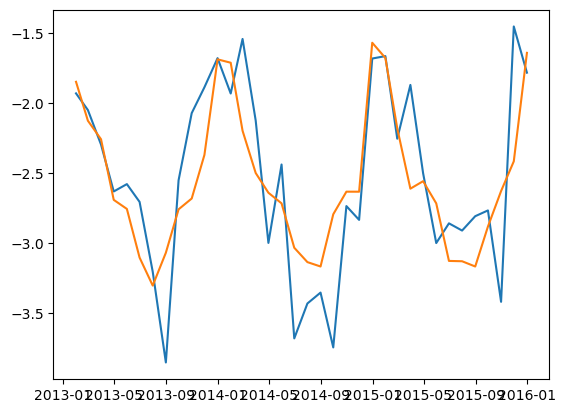

In [342]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])
joined_df = pd.concat([test_data, future_forecast], axis=1)

print(joined_df)

plt.plot(joined_df['Date'],joined_df[NUTS2], label='Original Series')
plt.plot(joined_df['Date'],joined_df['Prediction'], label='Prediction')


Text(0.5, 1.0, 'Logarithmus of monthly wind power generation time series (onshore) for NUTS2 level: DE71')

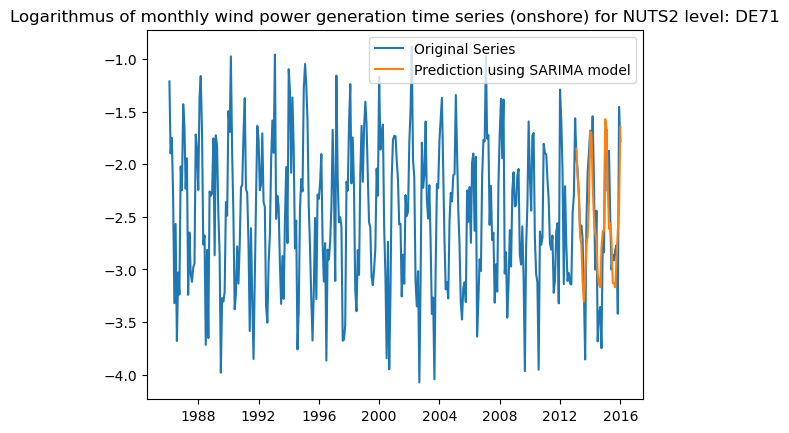

In [363]:
joined_df = pd.concat([df_selected,future_forecast],axis=1)

plt.plot(df_selected['Date'],joined_df[NUTS2], label='Original Series')
plt.plot(joined_df['Date'],joined_df['Prediction'], label='Prediction using SARIMA model')
plt.legend()
plt.title('Logarithmus of monthly wind power generation time series (onshore) for NUTS2 level: DE71')

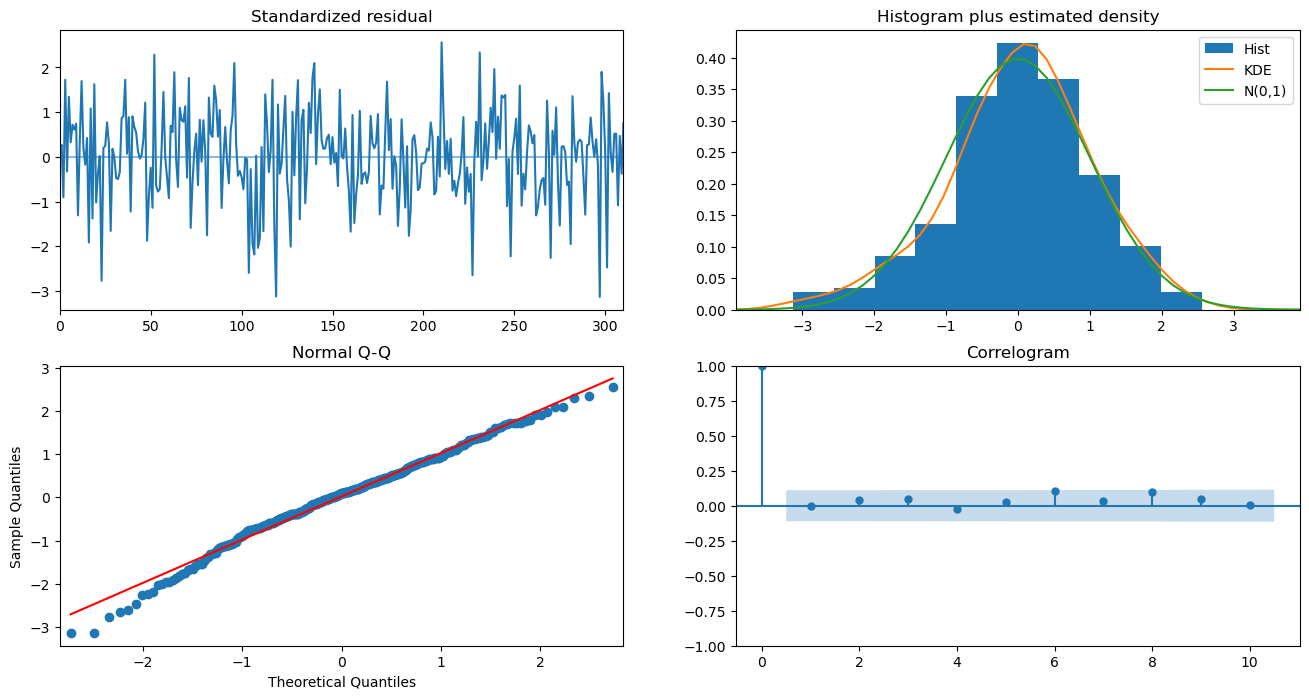

In [344]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance between (-4, 4).
The standardize residual plot: The residuals over time don’t display any obvious seasonality and appear to be white noise.

Top Right: The density plot suggest normal distribution with mean zero.
Histogram plus estimated density plot: The red KDE line follows closely with the N(0,1) line. This is a good indication that the residuals are normally distributed.

Bottom left: The most part of the blue dots are over the red line, so it seems that the distribution in very low skewed (not skewed for me).
The Q-Q-plot: Shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is an indication that the residuals are normally distributed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.
The Correlogram plot: Shows that the time series residuals have low correlation with lagged versions of itself.

https://www.kaggle.com/code/leandrovrabelo/climate-change-forecast-sarima-model

Before we go on, i'm going to split the data in training, validation and test set.

In [22]:
ts = df_selected

train = ts[:-60].copy()
val = ts[-60:-12].copy()
test = ts[-12:].copy()


Also I'm going to create a function to use the RMSE as a base to calculate the error, but you are free to use another parameter:

In [23]:
def measure_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def check_stationarity(y, lags_plots=100, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Monthly Wind (Onshore) Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(np.sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

C:\Users\Anwender\AppData\Local\Temp\ipykernel_20448\174067118.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -4.1289
p-value                          0.0009
Lags Used                       16.0000
Number of Observations Used    283.0000
Critical Value (1%)             -3.4537
Critical Value (5%)             -2.8718
Critical Value (10%)            -2.5722
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


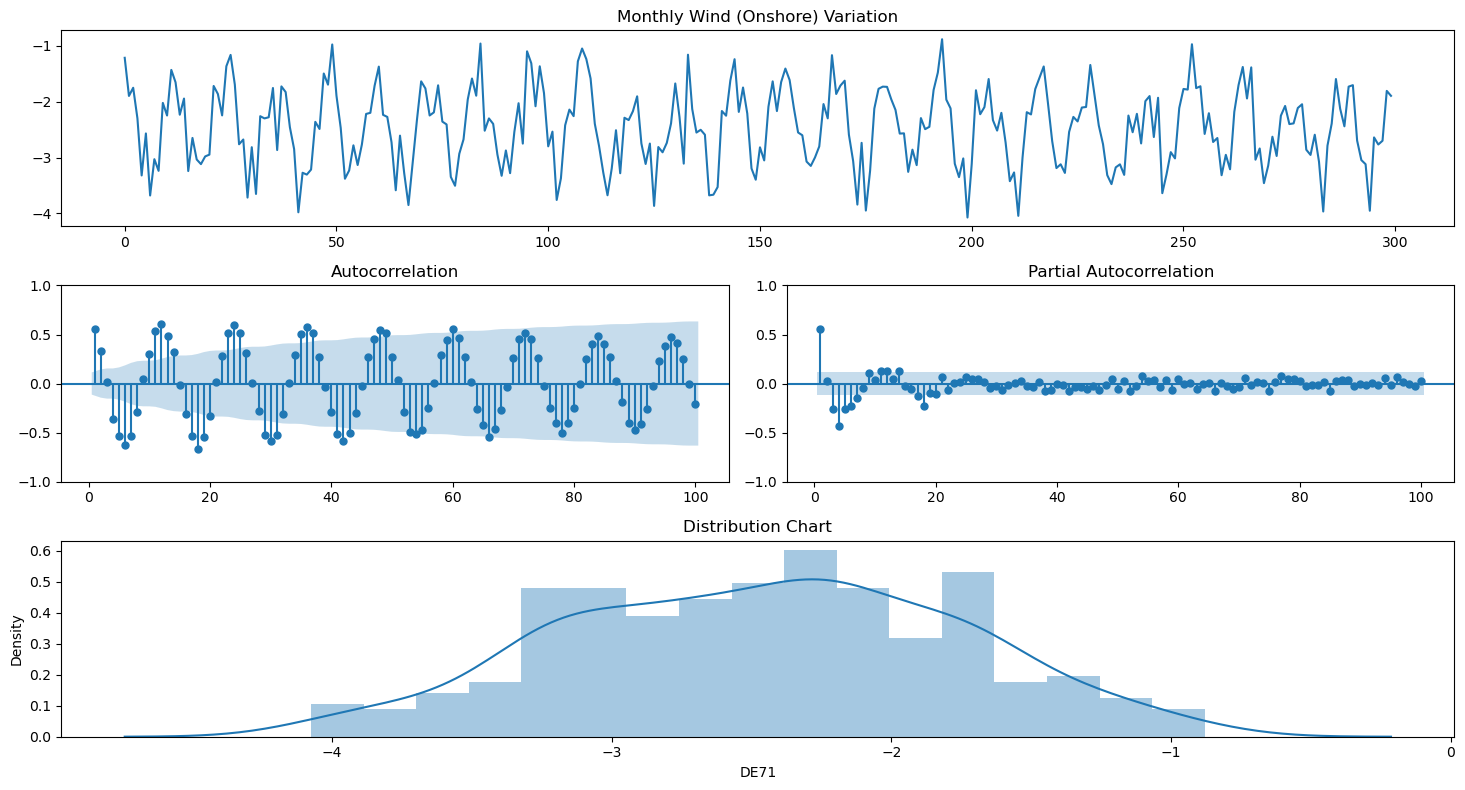

In [30]:
check_stationarity(train[NUTS2])

C:\Users\Anwender\AppData\Local\Temp\ipykernel_20448\174067118.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Results of Dickey-Fuller Test:
Test Statistic                  -7.4673
p-value                          0.0000
Lags Used                       11.0000
Number of Observations Used    276.0000
Critical Value (1%)             -3.4543
Critical Value (5%)             -2.8721
Critical Value (10%)            -2.5724
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


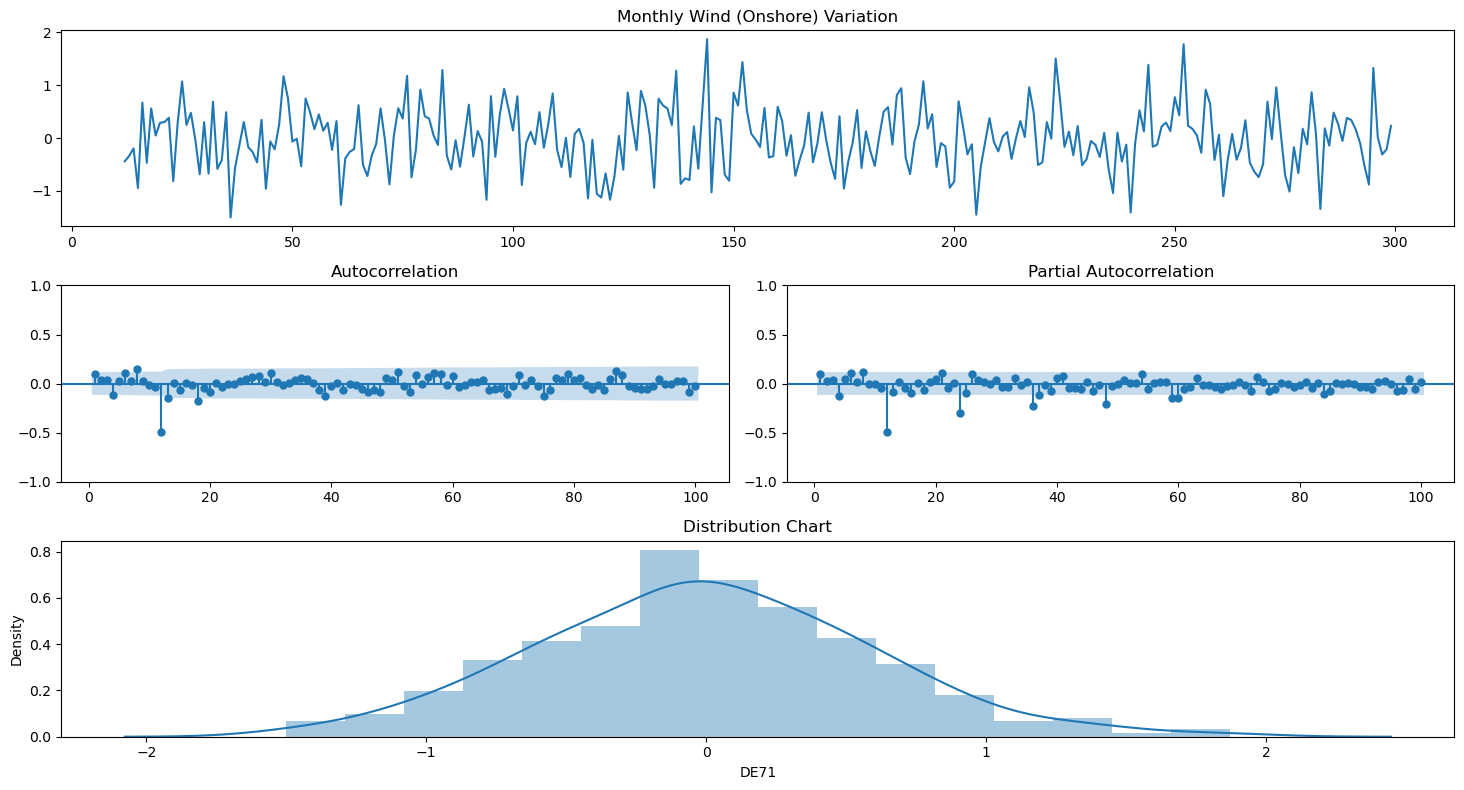

In [31]:
check_stationarity(train[NUTS2].diff(12).dropna())

In [32]:
def measure_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

Initially i'm going to work with the following (p,d,q) orders: (0, 0, 0), and with the following seasonal (P, D, Q, S) orders (1,1,0,12) and as the series has no clear trend i'm going to use in the model ('n').

To start forecasting the validation set, I'm going to create a function to use one-step-forecast in the whole validation set and measure the error:

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[300+week])
        
    return prediction

In [34]:
# Let's test it in the validation set
#print(train)
#print(val)
val['Pred'] = walk_forward(train[NUTS2], val[NUTS2], ((0,0,0),(1,1,0,12),'n'))

In [35]:
# Measuring the error of the prediction
rmse_pred = measure_rmse(val[NUTS2], val['Pred'])

print(f"The RMSE of the SARIMA(0,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)}")
# Creating the error column
val['Error'] = val[NUTS2] - val['Pred']

print(val)

The RMSE of the SARIMA(0,0,0),(0,1,1,12),'c' model was 0.4995
          Date      DE71      Pred     Error
300 2011-01-31 -1.907714 -2.413764  0.506051
301 2011-02-28 -2.137676 -1.922455 -0.215221
302 2011-03-31 -2.337711 -1.875839 -0.461872
303 2011-04-30 -2.752002 -2.778901  0.026899
304 2011-05-31 -2.810190 -2.998322  0.188132
305 2011-06-30 -2.677036 -2.850518  0.173482
306 2011-07-31 -3.222107 -3.505974  0.283867
307 2011-08-31 -3.093950 -3.318418  0.224468
308 2011-09-30 -2.643668 -2.776561  0.132893
309 2011-10-31 -2.560604 -2.542070 -0.018534
310 2011-11-30 -3.322386 -1.697284 -1.625102
311 2011-12-31 -1.289460 -2.011215  0.721755
312 2012-01-31 -1.591376 -2.175836  0.584459
313 2012-02-29 -2.056264 -1.933164 -0.123100
314 2012-03-31 -3.140572 -2.020024 -1.120547
315 2012-04-30 -2.208791 -2.723963  0.515172
316 2012-05-31 -2.760533 -2.926190  0.165658
317 2012-06-30 -3.108528 -2.894947 -0.213581
318 2012-07-31 -3.033200 -3.583226  0.550026
319 2012-08-31 -3.135365 -2.871031 -0.

In [37]:
from statsmodels.graphics.gofplots import qqplot
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0],data.iloc[:,1:3])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,2], data.iloc[:,3])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    qqplot(data.iloc[:,3], line='r', ax=ax3)
    ax3.set_title('Q-Q-Plot of residual')
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,3], lags=(len(data.iloc[:,3])-1),zero=False, ax=ax4)
    ax4.set_title('Autocorrelation of residual')
    plt.tight_layout()
    plt.show()

It's always important to check the residuals, I'm going to create a function to plot some important charts to help us visualize the residuals.

I'm going to plot the following charts:

Current and Predicted values through the time.

Residuals vs Predicted values in an scatterplot.

QQ Plot showing the distribution of errors and its ideal distribution

Autocorrelation plot of the Residuals to see if there is some correlation left.

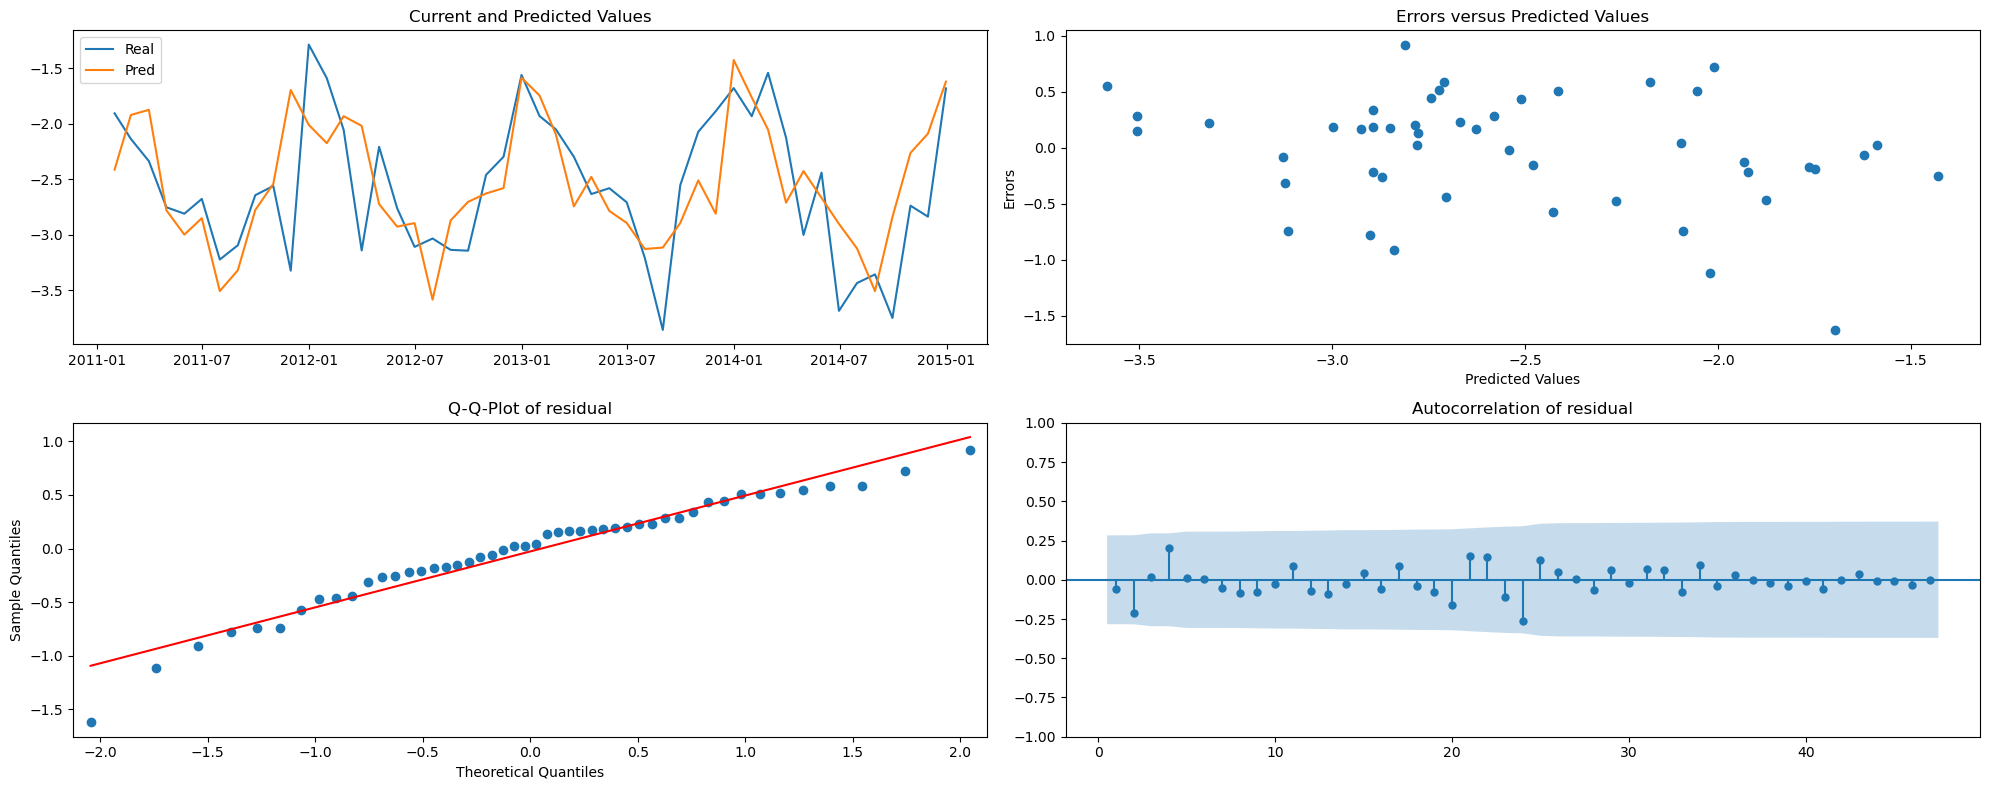

In [38]:
plot_error(val)

Analyzing the plots above we can see that the predictions fit very well on the current values.

The Error vs Predicted values has a linear distribution (the errors are between -1.5 and +1. while the temperature increases).

The QQ Plot shows a normal pattern with some little outliers and,

The autocorrelation plot shows a positive spike over the confidence interval just above the second lag, but I believe that there is no need for more changes.